In [52]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

In [53]:
df = pd.read_csv("subway-data.csv")

In [54]:
df.isna().sum()

,0
Date,0
Time,0
Day,0
Station,0
Code,0
Min Delay,0
Min Gap,0
Bound,8614
Line,33
Vehicle,0


In [55]:
not_null_df = df.dropna(inplace=False)
not_null_df.isna().sum()

,0
Date,0
Time,0
Day,0
Station,0
Code,0
Min Delay,0
Min Gap,0
Bound,0
Line,0
Vehicle,0


In [62]:
# Top 10 stations with most delays (appeared most in the given dataset)
station_counts = not_null_df['Station'].value_counts().sort_values(ascending=False)
station_counts.head(10)

,count
Station,
BLOOR STATION,764
KIPLING STATION,519
DUNDAS STATION,490
KENNEDY BD STATION,481
EGLINTON STATION,415
YONGE BD STATION,402
FINCH STATION,379
ST GEORGE YUS STATION,314
VAUGHAN MC STATION,312


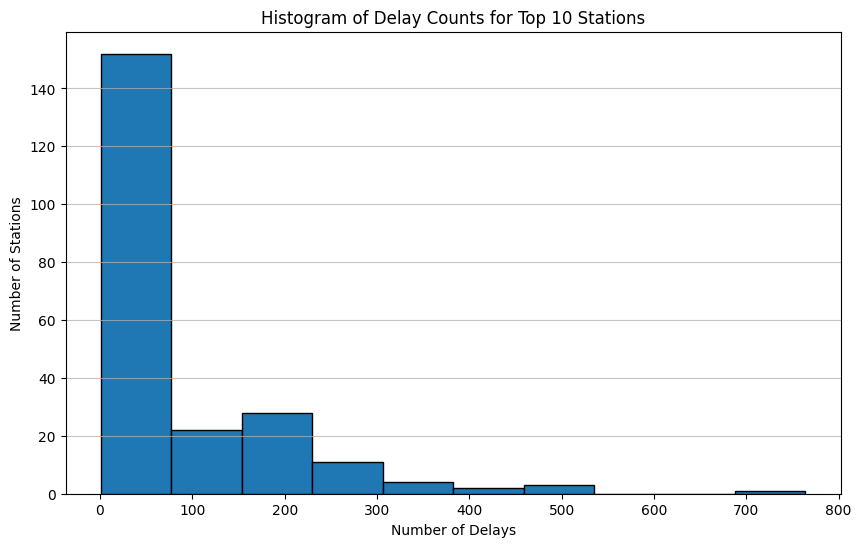

In [63]:
# prompt: help me create a matplotlib histogram to represent the station_counts calculated earlier

plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.hist(station_counts, edgecolor='black')  # Create the histogram
plt.xlabel('Number of Delays')
plt.ylabel('Number of Stations')
plt.title('Histogram of Delay Counts for Top 10 Stations')
plt.grid(axis='y', alpha=0.75)
plt.show()


In [75]:
# prompt: i need to count of each date in my dataset sorted in descending order
date_counts = not_null_df['Date'].value_counts()
sorted_date_counts = date_counts.sort_values(ascending=False)
sorted_date_counts.head(10)

,count
Date,
2024-03-22,76
2024-01-19,76
2024-04-04,73
2024-05-06,73
2024-04-09,72
2024-01-31,70
2024-08-13,70
2024-09-09,69
2024-04-30,68


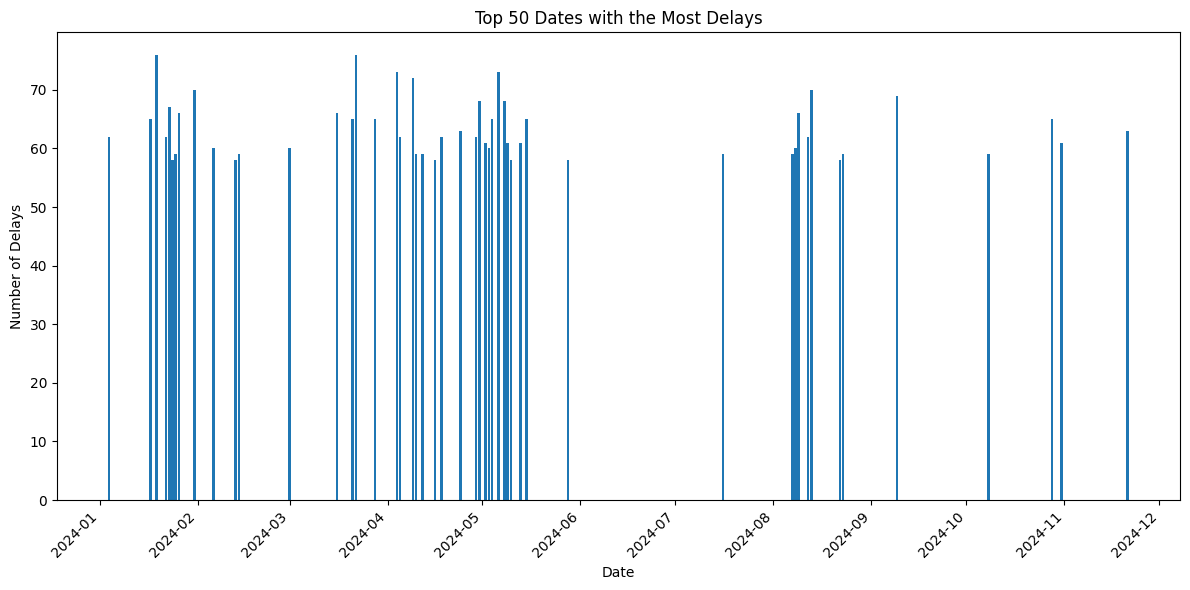

In [79]:
# prompt: create a top 50 sorted_date_delays bar graph using matplotlib. on the x-axis, there should be the date values and on y axis, i want the count values

import matplotlib.pyplot as plt

# Assuming 'sorted_date_counts' is already defined from the previous code

# Create a bar graph of the top 50 dates with the most delays
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sorted_date_delays = sorted_date_counts.head(50)
plt.bar(sorted_date_delays.index, sorted_date_delays.values)
plt.xlabel('Date')
plt.ylabel('Number of Delays')
plt.title('Top 50 Dates with the Most Delays')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


In [83]:
# Top 10 stations with most delays (appeared most in the given dataset)
line_counts = not_null_df['Line'].value_counts().sort_values(ascending=False).sort_values(ascending=False)
line_counts

,count
Line,
YU,8526
BD,6444
SHP,528
YU/BD,4
YUS,3
BLOOR DANFORTH,1
LINE 1,1


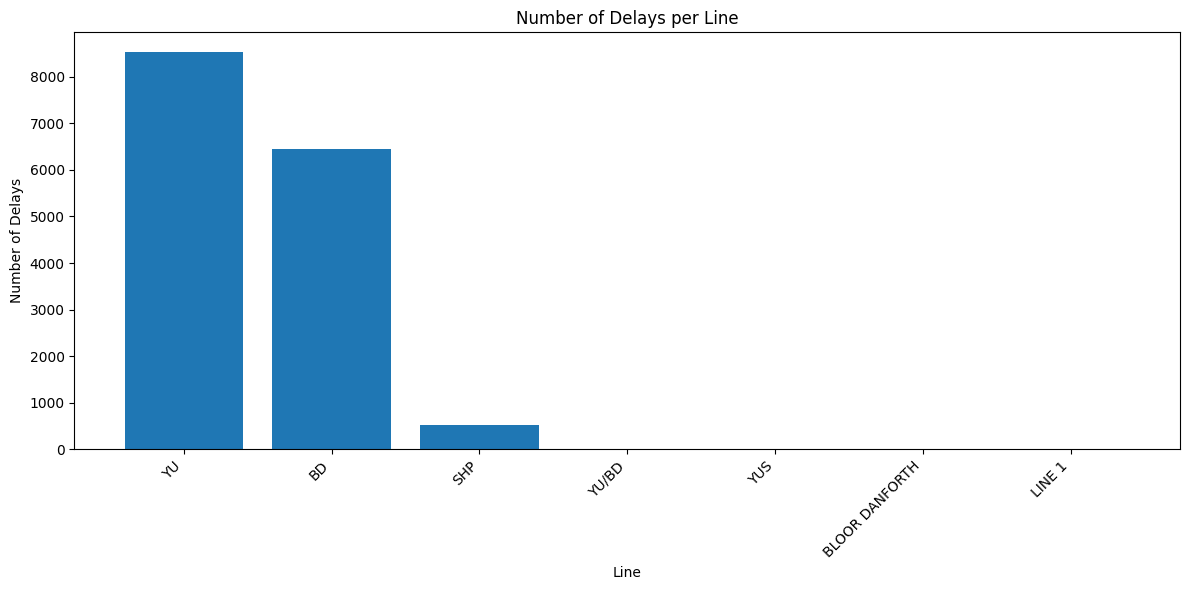

In [84]:
# Create a bar graph of the line counts
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.bar(line_counts.index, line_counts.values)
plt.xlabel('Line')
plt.ylabel('Number of Delays')
plt.title('Number of Delays per Line')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [125]:
# Top 10 stations with most delays (appeared most in the given dataset)
no_zero_delays = not_null_df[not_null_df['Min Delay'] > 0]
vehicle_counts = no_zero_delays['Vehicle'].value_counts().sort_values(ascending=False)
vehicle_counts.head(10)


,count
Vehicle,
0,107
5896,56
5616,55
6061,54
5466,53
5956,52
6031,50
5421,49
5751,49


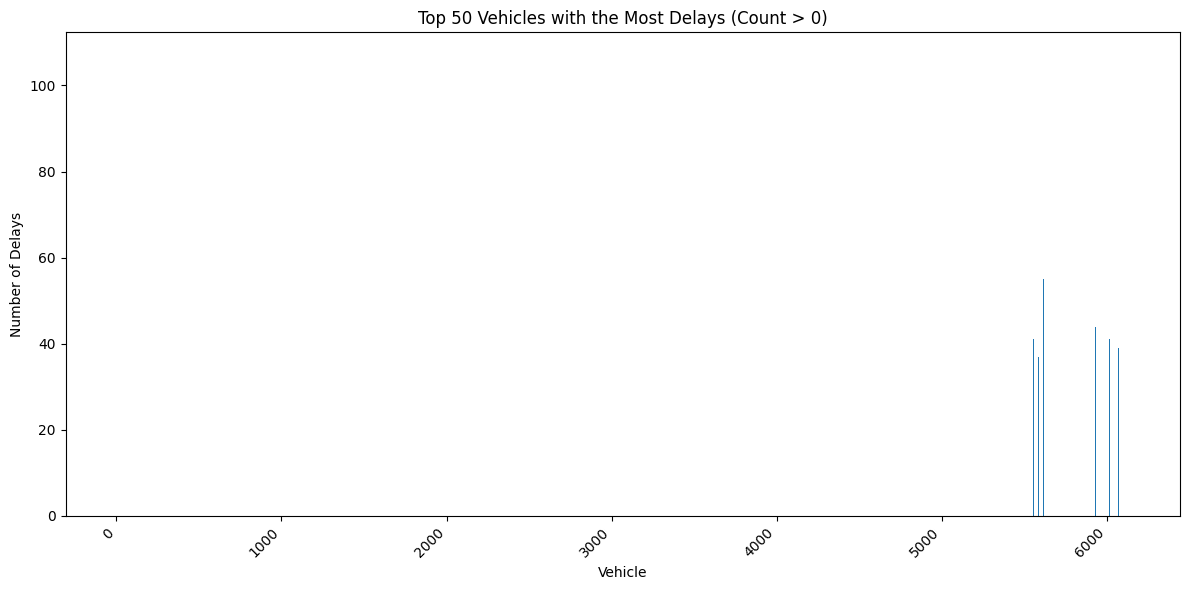

In [150]:
# prompt: generate a bar graph visualizing vehicle_counts with top 50 vehicle on x axis and count on y axis such that count for vehicle > 0

import matplotlib.pyplot as plt

# Assuming 'vehicle_counts' is already defined from the previous code

# Create a bar graph of the top 50 vehicles with the most delays
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
top_50_vehicles = vehicle_counts.head(50)
plt.bar(top_50_vehicles.index, top_50_vehicles.values)
plt.xlabel('Vehicle')
plt.ylabel('Number of Delays')
plt.title('Top 50 Vehicles with the Most Delays (Count > 0)')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


In [104]:
time_counts = no_zero_delays['Min Delay'].value_counts().sort_values(ascending=False)
time_counts.head(10)

,count
Min Delay,
3,2028
4,1499
5,1397
6,775
7,557
8,328
9,257
10,241
12,171


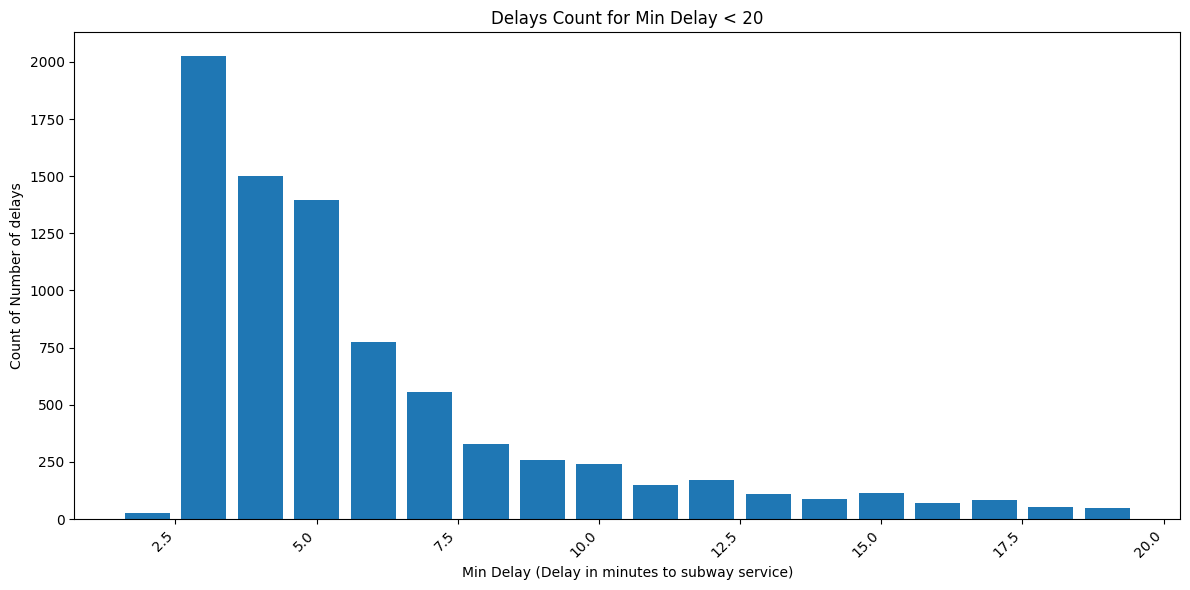

In [142]:
# Filter time_counts for Min Delay < 20
filtered_time_counts = time_counts[time_counts.index < 20]

# Create the bar graph
plt.figure(figsize=(12, 6))
plt.bar(filtered_time_counts.index, filtered_time_counts.values)
plt.xlabel('Min Delay (Delay in minutes to subway service)')
plt.ylabel('Count of Number of delays')
plt.title('Delays Count for Min Delay < 20')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [132]:
# Days with the most delays
day_counts = not_null_df['Day'].value_counts()
# day_counts

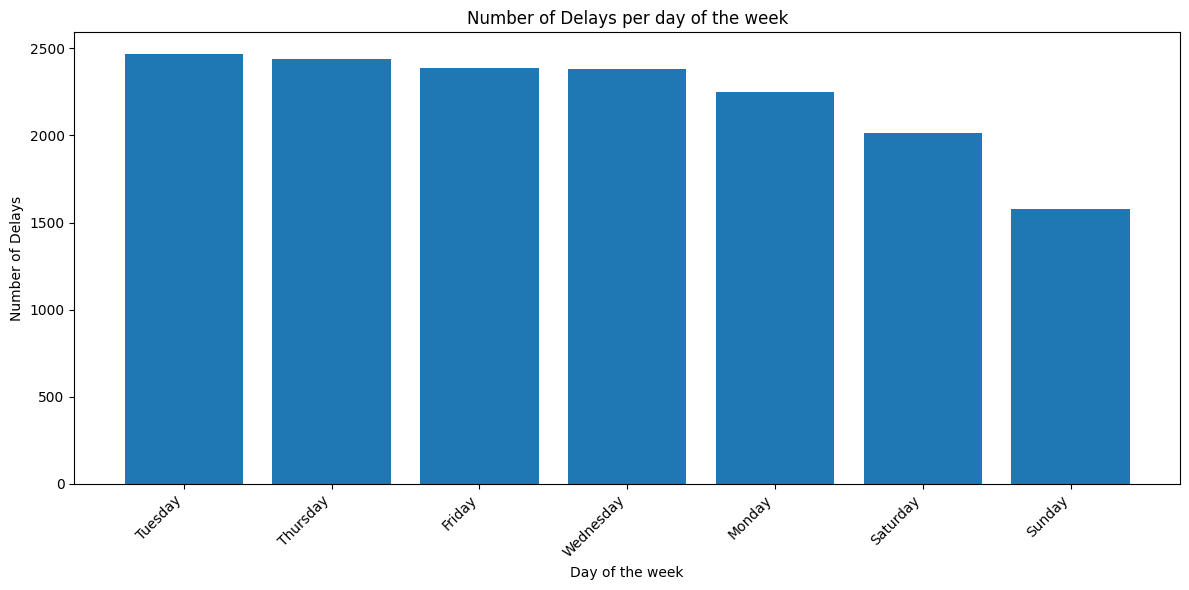

In [137]:
# Create a bar graph of the day_counts
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.bar(day_counts.index, day_counts.values)
plt.xlabel('Day of the week')
plt.ylabel('Number of Delays')
plt.title('Number of Delays per day of the week')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [151]:
# Bound/direction with most delays
bound_counts = not_null_df['Bound'].value_counts().sort_values(ascending=False)
bound_counts

,count
Bound,
S,4360
N,4141
W,3516
E,3467
B,23


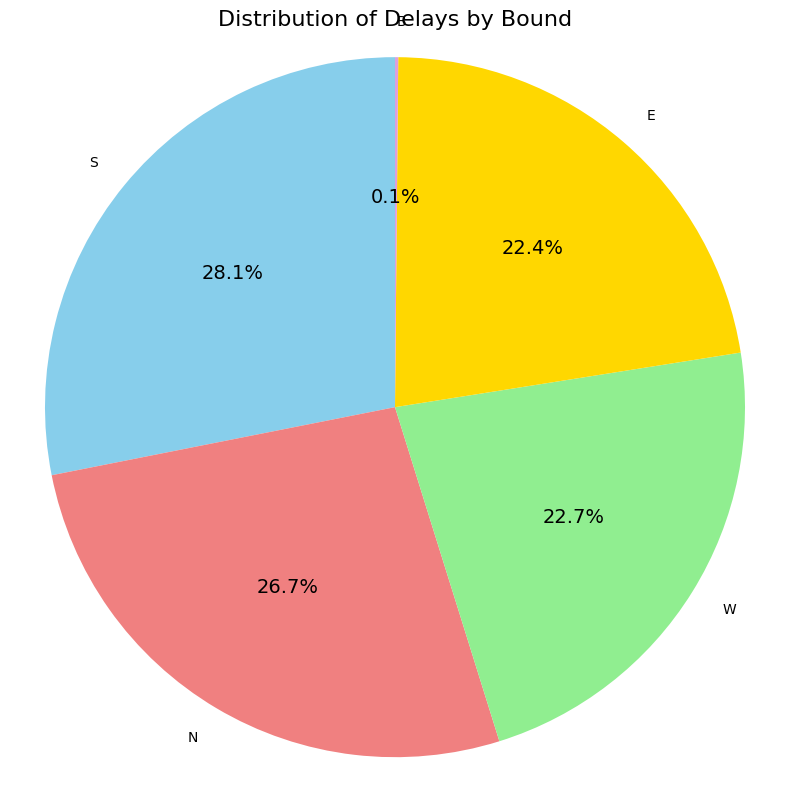

In [158]:
# Define a list of good contrasting colors
colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold', 'plum', 'lightblue', 'orange', 'lightseagreen', 'wheat', 'pink']

# Create the pie chart
plt.figure(figsize=(8, 8))
patches, texts, autotexts = plt.pie(bound_counts, labels=bound_counts.index, autopct='%1.1f%%', startangle=90, colors=colors[:len(bound_counts)])

# Increase font size for percentages
for autotext in autotexts:
    autotext.set_fontsize(14)

plt.title('Distribution of Delays by Bound', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()


In [160]:
# Time (out of 24H) of the day with most delays
time_counts = not_null_df['Time'].value_counts()
time_counts.head(10)

,count
Time,
08:46,32
05:54,32
05:50,30
06:02,29
05:48,28
17:53,28
05:53,28
14:10,27
13:53,25


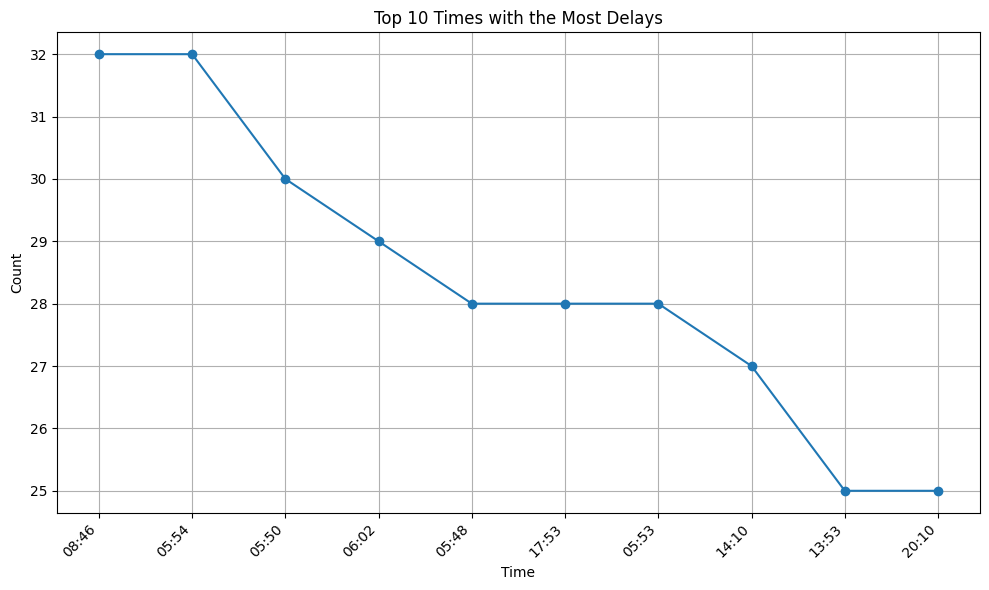

In [164]:
# prompt: create a line graph with each dot for a top 10 datapoint visualizing time_counts, using time on x axis and count on y axis using matplotlib

import matplotlib.pyplot as plt

# Assuming 'time_counts' is already defined from the previous code
top_10_time_counts = time_counts.head(10)

# Create the line graph using matplotlib
plt.figure(figsize=(10, 6))
plt.plot(top_10_time_counts.index, top_10_time_counts.values, marker='o', linestyle='-')
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Top 10 Times with the Most Delays')
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


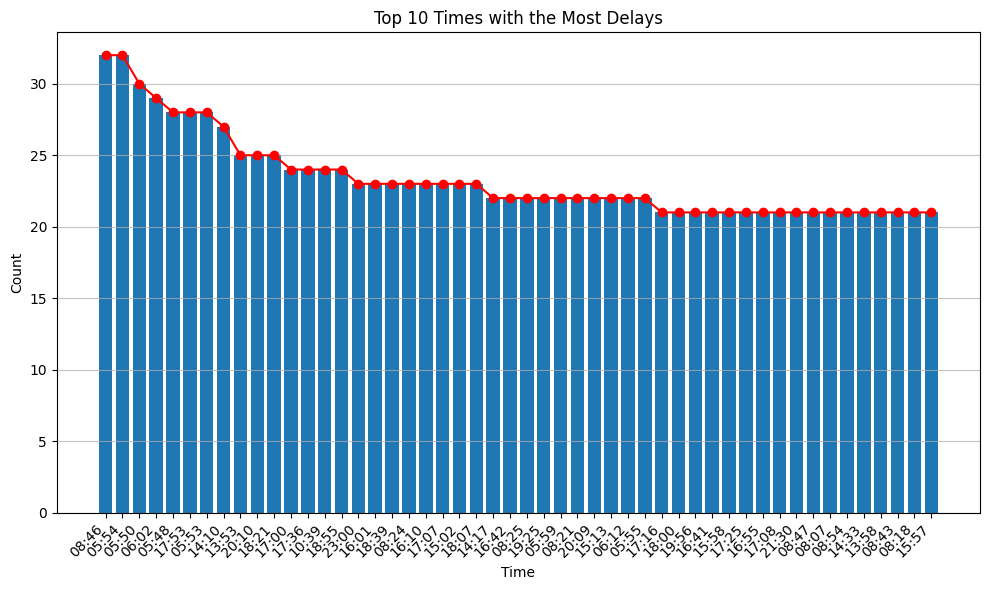

In [170]:
# prompt: create a bar graph with each dot for a top 10 datapoint visualizing time_counts, using time on x axis and count on y axis using matplotlib

import matplotlib.pyplot as plt

# Assuming 'time_counts' is already defined from the previous code
top_10_time_counts = time_counts.head(50)

# Create the bar graph with each dot for a top 10 datapoint
plt.figure(figsize=(10, 6))
plt.bar(top_10_time_counts.index, top_10_time_counts.values)  # Create the bar graph
plt.plot(top_10_time_counts.index, top_10_time_counts.values, marker='o', linestyle='-', color='red') # Overlay the dots
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Top 10 Times with the Most Delays')
plt.grid(True, axis='y', alpha=0.75)  # Add a grid for better visualization
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


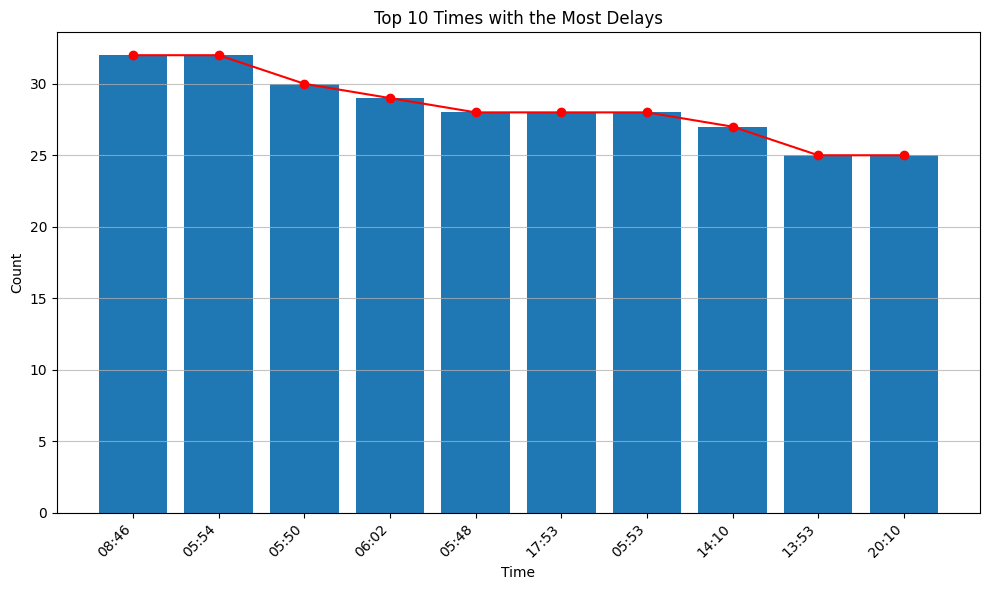

In [169]:
# prompt: create a density plot with each dot for a top 10 datapoint visualizing time_counts, representing the time and the count

import matplotlib.pyplot as plt
# Assuming 'time_counts' is already defined from the previous code
top_10_time_counts = time_counts.head(10)

# Create the bar graph with each dot for a top 10 datapoint
plt.figure(figsize=(10, 6))
plt.bar(top_10_time_counts.index, top_10_time_counts.values)  # Create the bar graph
plt.plot(top_10_time_counts.index, top_10_time_counts.values, marker='o', linestyle='-', color='red') # Overlay the dots
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Top 10 Times with the Most Delays')
plt.grid(True, axis='y', alpha=0.75)  # Add a grid for better visualization
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [171]:
# Top codes with the most delays
code_counts = not_null_df['Code'].value_counts().sort_values(ascending=False)
code_counts.head(10)

,count
Code,
SUDP,2005
MUPAA,1620
SUO,1378
PUOPO,1374
MUIR,716
SUUT,632
MUIS,524
MUSC,504
TUSC,459


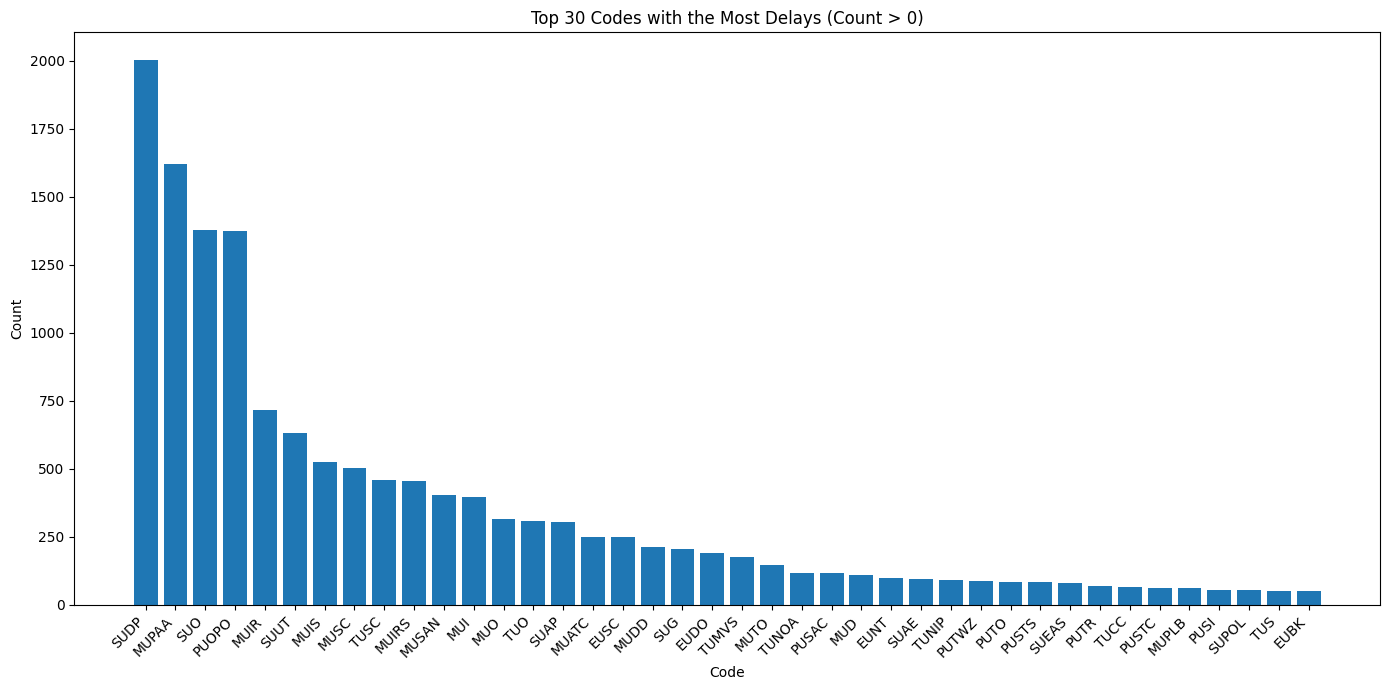

In [173]:
# prompt: visualize the code_counts with a bar graph with top 30 code on x-axis and count on y axis such that count > 0 and

import matplotlib.pyplot as plt
# Assuming 'code_counts' is already defined from the previous code

# Filter out codes with counts greater than 0
code_counts_filtered = code_counts[code_counts > 0]

# Get the top 30 codes
top_30_codes = code_counts_filtered.head(40)

# Create the bar graph
plt.figure(figsize=(14, 7))
plt.bar(top_30_codes.index, top_30_codes.values)
plt.xlabel('Code')
plt.ylabel('Count')
plt.title('Top 30 Codes with the Most Delays (Count > 0)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [174]:
df2 = pd.read_csv("subway-delay-codes.csv")

In [176]:
df2.columns

Index(['Number', 'SUB RMENU CODE', 'CODE DESCRIPTION'], dtype='object')

In [178]:
# prompt: i want to find the row with 'SUB RMENU CODE' = ''SUDP' from df2

# Find the row where 'SUB RMENU CODE' is 'SUDP'
row_with_sudp = df2[df2['SUB RMENU CODE'] == 'SUDP']

# Print the row (or handle it as needed)
row_with_sudp


,Number,SUB RMENU CODE,CODE DESCRIPTION
104,105,SUDP,Disorderly Patron
